In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Métodos implementados

In [ ]:
def newton_raphson(f, df, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x1 = None
  diff = 1

  while err > epsilon and iter < maxiter and diff > 1e-5:
    x1 = x0 - f(x0)/df(x0)
    diff = abs(x1-x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1
    #print(f"x_{iter} = {x0}")

  return x0, err, iter

In [ ]:
def secant_mtd(f, x1, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x_ant, x = x1, x0

  phi = lambda x1,x0: (x1*f(x0) - x0*f(x1))/(f(x0) - f(x1))

  while err > epsilon and iter < maxiter:
    x_ant, x = x, phi(x_ant, x)
    err = abs(x - x_ant)/abs(x)
    iter += 1

  return x, err, iter

In [ ]:
def encontra_intervalo(a0,xmax,step,f):
  refi = a0
  while step > 1e-4:
    b0 = a0+step
    while b0 < xmax:
      if f(a0)*f(b0) < 0:
        return a0,b0
      a0=b0
      b0=a0+step
    a0=refi
    step=step/10

In [ ]:
def encontra_varios_intervalos(a0,xmax,step,f):
  refi = a0
  vet_a0 = []
  vet_b0 = []
  while step > 1e-4:
    b0 = a0+step
    while b0 < xmax:
      if f(a0)*f(b0) < 0:
        vet_a0.append(a0)
        vet_b0.append(b0)

      a0=b0
      b0=a0+step
    if len(vet_a0) > 0:
      return vet_a0,vet_b0

    a0=refi
    step=step/10

# 1 – Encontre a raiz positiva da função $f(x) = cos(x) - x^{2}$ pelo método de Newton inicializando-o com $x^{(0)} = 1$. Realize a iteração até obter estabilidade no quinto dígito significativo.

In [ ]:
f1 = lambda x: np.cos(x) - x**2
df1_dx = lambda x: - np.sin(x) -2*x

In [ ]:
ans = newton_raphson(f1, df1_dx, 1)
ans

(0.8241323123025225, 8.188498725892985e-09, 4)

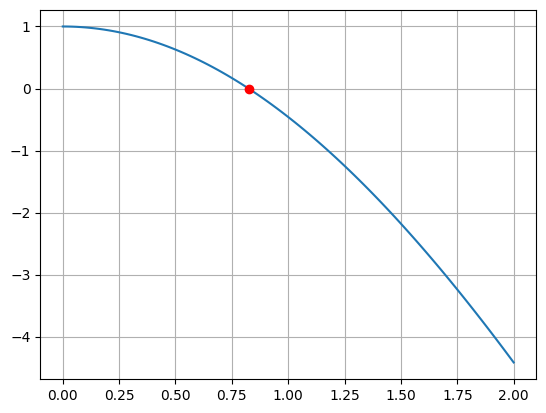

In [ ]:
x = np.linspace(0, 2, 100)
plt.plot(x, f1(x))
plt.grid()
plt.plot(0.824,0, 'ro');

# 2 – Considere o problema de calcular as soluções positivas da equação: $tg(x) = 2x^{2}$.

## (a) Use um método de busca intervalar para isolar as duas primeiras raízes positivas em pequenos intervalos;

In [ ]:
f2 = lambda x: np.tan(x) - 2*x**2
df2_dx = lambda x: (1/np.cos(x))**2 - 4*x

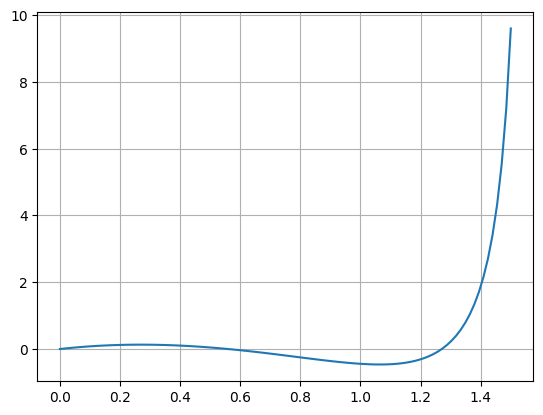

In [ ]:
x = np.linspace(0, 1.5, 100)
plt.plot(x, f2(x))
plt.grid()

In [ ]:
vxl,vxu = encontra_varios_intervalos(0,2,0.1,f2)

## (b) Calcule cada uma das raízes pelo método de Newton com oito dígitos significativos e discuta a convergência.

In [ ]:
for i in range(2):
  ans = newton_raphson(f2,df2_dx, vxl[i])
  print(f"x{i} = {ans}")

x0 = (0.5597041522730807, 6.276387755440143e-09, 4)
x1 = (1.2703426478006645, 3.491105444248879e-07, 5)


# 3 – Aplique o método de Newton à função $f(x) = x^{n} - A$ e construa um esquema computacional para calcular $^{n}\sqrt{A}$ para A > 0 com base em operações de multiplicação e soma/subtração.

# 4 – Encontre as raízes do polinômio $f(x) = x^{4} - 4x^{2} + 4$ através do Método das Secantes. O que você observa em relação ao erro obtido ?

In [ ]:
f4 = lambda x: x**4 - 4*x**2 + 4

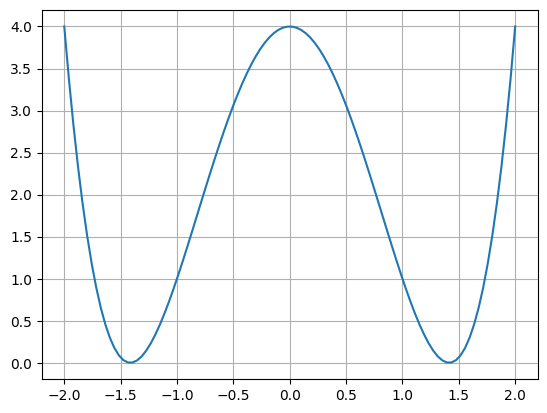

In [ ]:
x = np.linspace(-2,2,100)
plt.plot(x, f4(x))
plt.grid()

In [ ]:
ans = secant_mtd(f4, -2, -1)
ans

(-1.4141951459257924, 8.048558003695469e-06, 21)

In [ ]:
ans = secant_mtd(f4, 1, 1.7)
ans

(1.4142320641482526, 8.085296881497784e-06, 23)

# 5 – Encontre as raízes reais do polinômio $f(x) = \frac{x^{5}}{100} + x^{4} + 3x + 1$ isolando-as por um método a sua escolha e depois usando o Método das Secantes. Expresse a solução com 7 dígitos significativos

In [ ]:
f5 = lambda x: x**5/100 + x**4 + 3*x + 1

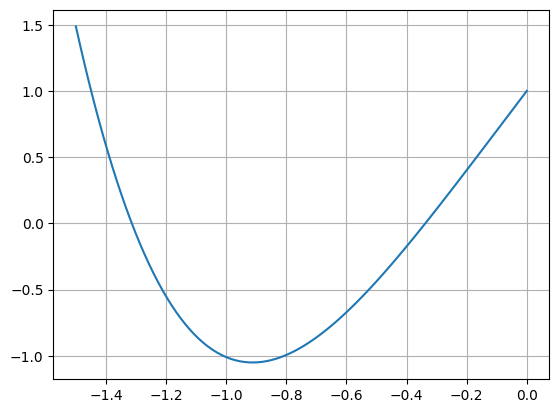

In [ ]:
x = np.linspace(-1.5,0,100)

plt.plot(x, f5(x))
plt.grid()

In [ ]:
ans = secant_mtd(f5, -1.4, -1.2)
ans

(-1.3140064716862752, 6.143169222412495e-07, 5)

In [ ]:
ans = secant_mtd(f5, -0.5, 0)
ans

(-0.3376513449664311, 2.9577509839891096e-06, 4)

# 6 – Resolva numericamente a inequação:

$$e^{-x^{2}} < 2x$$

In [ ]:
f6 = lambda x: np.exp(-x**2) - 2*x
df6_dx = lambda x: -2*x*np.exp(-x**2) - 2

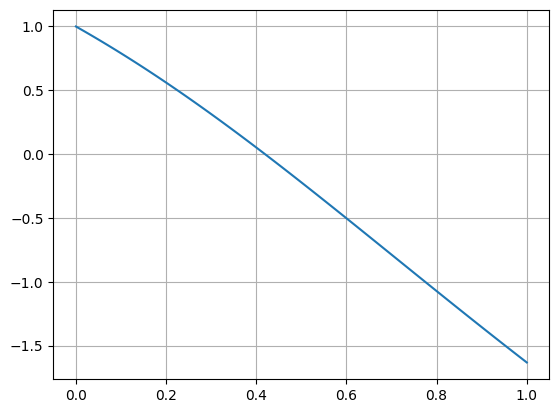

In [ ]:
x = np.linspace(0,1,100)
plt.plot(x, f6(x))
plt.grid()

In [ ]:
ans = secant_mtd(f6,0,1)
ans

(0.4193648240191182, 1.1788386855961771e-08, 5)

In [ ]:
ans = newton_raphson(f6,df6_dx,0)
ans

(0.4193648240191416, 5.101133686031128e-07, 4)